In [3]:
# In Python it is standard practice to import the modules we need at the very top of our scripts
import numpy as np
import matplotlib.pyplot as plt

# Curve Fitting Simple Harmonic Motion

Simple Harmonic Motion is important in many engineering disciplines. Most often as the oscillatory motion of a *mass on a spring* (which is useful in approximating vibration modes in building structures, airframes or vehicle suspensions), but the same equations well describe current and voltage oscillations in electrical circuits containing capacitor/inductor combinations.

You will take some experimental data from student measurements of 1kg masses on springs, predict what the underlying engineering physics says about the motion, and then work out how well theory fits experiment, plotting results to make the fitting clear, as well as calculating a measure of the quality of fit.

In order to prepare for the main analysis, we will first give some preparatory material on curve fitting to arbitrary functions. 

## Curve fitting - SciPy

SciPy, like NumPy, is one of many modules that can be used to extend Python's functionality. SciPy includes functions for integration, interpolation, signal processing, linear algebra and more. Between NumPy, SciPy and Matplotlib you should be able to accomplish many data analysis tasks. The SciPy documentation is identical in style to the NumPy documentation so you should already feel comfortable finding your way around and reading documentation for functions.

#### Importing SciPy Submodules

You have probably noticed that to call a function from, for example, the NumPy module we use a dot, e.g. `np.zeros()`, and sometimes we call a function from a submodule, e.g. `np.random.randint()`. However, a small quirk in SciPy, due to its size, is that each SciPy submodule has to be imported separately.

As such, it is unlikely that you will ever just `import scipy as sp` but you will more likely import specific submodules, such as in the cell below where we import just the `stats` submodule.

In these scenarios we can then for example access the `sem` function by writing `stats.sem()`, which calculates the standard error of the mean.

In [31]:
from scipy import stats
from scipy import optimize

### Least Squares Fitting of a Function to Data

An important tool in data analysis is the ability to fit a function to raw data in order to extract parameters of a model; likewise, measuring the 'goodness of fit' of a function can be used to test an underlying hypothesis.

There are many alternative ways to do fitting in Python. The SciPy function `optimize.curve_fit` will fit a mathematical function to data. Although simpler methods exist for a basic linear fit, as soon as we want to fit to a more complex function we usually have to use `optimize.curve_fit`. Therefore, we may as well learn about this method from the start!

For the purposes of this exercise we will generate some simple data that we can be fairly sure should fit a linear function:

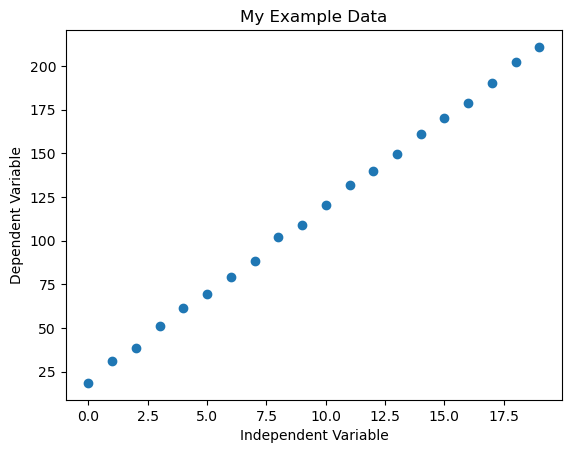

In [47]:
# Example Data
x = np.arange(20)
m = 10
c = 20
# Generate some data, with random 'jitter' for realism
# Note that we use randn to generate our randomness. 
# The number 10 tells it to generate ten numbers (from a normal distribution),
# one number for each of the ten x coordinates we are generating data for.
y_jittered = m*x + c + 1*np.random.randn(20)  

plt.scatter(x, y_jittered)
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('My Example Data')
plt.show()

First we define a Python function for the mathematical function that we want to fit to our data.

In [27]:
def linear_function(x, m, c):   
    # function of a straight line y = mx + c
    return m*x + c

# Note that we can call the new function we have defined, just like we call np.sin(x),
# by passing it the parameters (three in this case) that it expects

x = float(input('please input x'))
gradient = 2
intercept = 1
functionResult = linear_function(x, gradient, intercept)
print('Calling our function: when x={3}, y={0}x+{1} = {2}'.format(gradient, intercept, functionResult, x))

please input x 5.2


Calling our function: when x=5.2, y=2x+1 = 11.4


Now we tell curve_fit to find the best fit to our data using our new function 'linear_function'. In other words, curve_fit will tell us the values of m and c that provide the best fit to our data. The values passed to curve_fit using the parameter p0 (1 and 0) represent a 'plausible' initial guess for m and c.


Somewhat unusually, curve_fit returns **two** sets of information (params and params_covariance).
* 'params' contains the best fit values of m and c as a list with two parameters
* 'params_covariance' tells us about how good the best fit actually was

In [41]:
print('Calculating linear fit...')
params, params_covariance = optimize.curve_fit(linear_function, x, y_jittered, p0=[1, 0])
fittedM = params[0]   # Make sure we don't use 'm' and 'c' as variables here, because we already
fittedC = params[1]   # used them earlier to define the ideal expected values of m and c.
print(' Best fit has equation y = {0:.2f}x + {1:.2f}'.format(fittedM, fittedC))
print(params_covariance)

Calculating linear fit...
 Best fit has equation y = 225.30x + -1056.22
[[ 3.61122995e+31 -1.87783956e+32]
 [-1.87783956e+32  9.76476565e+32]]


So `optimize.curve_fit` got pretty close to the set up values. But how close? Often the goodness of fit is measured using the $\chi^2$ test, which looks at how far away each actual point is from the modelled point:
$$\chi^2 = \sum_i \left(\frac{y_i - y_{th}(x_i)}{\sigma_{m,i}}\right)^2$$
where $y_i$ are the experimental measurements, $y_{th}(x_i)$ are the theoretically-predicted values, and $\sigma_{m,i}$ are the measurement errors on each measurement $i$. We will assume a measurement error of 3.0 on each datapoint below.

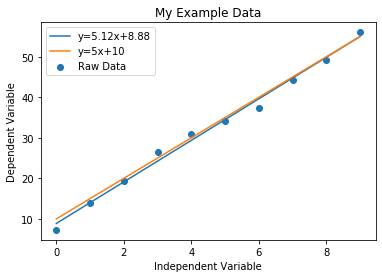

Chi-squared: 1.89


In [9]:
y_fitted = fittedM*x + fittedC
plt.scatter(x, y_jittered, label='Raw Data')
plt.plot(x, y_fitted, label='y={0:.2f}x+{1:.2f}'.format(fittedM, fittedC))
plt.plot(x, m*x+c, label='y={0}x+{1}'.format(m, c))
plt.legend()
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('My Example Data')
plt.savefig('linear_fitting.png')
plt.show()

sigma = 3
chiSquared = np.sum((y_jittered - y_fitted)**2 / sigma**2)
print('Chi-squared: {0:.2f}'.format(chiSquared))

#### Fitting more complicated functions

`optimize.curve_fit` can fit with more complicated functions than straight lines. In the example below we set up a trial function which is an upside down cosine wave over the first few degrees of its travel, to give a gentle curve, jittered with some randomness. 
Then we try and curve fit this data to a general quadratic function, to see what the besty quadratic approximation is to this trial data.

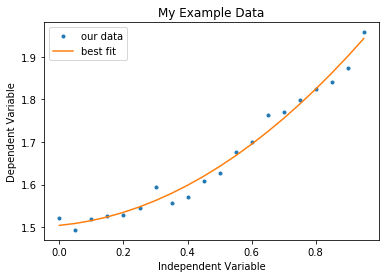

Best fit has equation y = 0.41x^2 + 0.07x + 1.50


In [11]:
# Generate a range of x values from 0 to 1, with intervals of 0.05
x = np.arange(0, 1, 0.05)
# Generate some simulated data.
# Note the little trick of using 'x.size' so that we don't need to know and write down explicitly
# the size of the array x that we need to pass to randn.
y_jittered = 2 - 0.5*np.cos(1.5*x) + 0.02*np.random.randn(x.size)

def quadratic_function(x, a, b, c):
    return a*x**2 + b*x + c

params, params_covariance = optimize.curve_fit(quadratic_function, x, y_jittered,
                                               p0=[1, 0, 0])
plt.plot(x, y_jittered, '.', label='our data')
plt.plot(x, quadratic_function(x, params[0], params[1], params[2]), label='best fit')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('My Example Data')
plt.legend()
plt.show()
print('Best fit has equation y = {0:.2f}x^2 + {1:.2f}x + {2:.2f}'.format(params[0], params[1], params[2]))